In [12]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [13]:
df=pd.read_csv("/kaggle/input/road-accident-severity-in-india/Road.csv")


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [15]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [16]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [17]:
df[['Driving_experience','Area_accident_occured','Road_surface_conditions','Light_conditions','Weather_conditions','Number_of_casualties','Casualty_severity','Cause_of_accident','Accident_severity']].dropna()

,Driving_experience,Area_accident_occured,Road_surface_conditions,Light_conditions,Weather_conditions,Number_of_casualties,Casualty_severity,Cause_of_accident,Accident_severity
0,1-2yr,Residential areas,Dry,Daylight,Normal,2,na,Moving Backward,Slight Injury
1,Above 10yr,Office areas,Dry,Daylight,Normal,2,na,Overtaking,Slight Injury
2,1-2yr,Recreational areas,Dry,Daylight,Normal,2,3,Changing lane to the left,Serious Injury
3,5-10yr,Office areas,Dry,Darkness - lights lit,Normal,2,3,Changing lane to the right,Slight Injury
4,2-5yr,Industrial areas,Dry,Darkness - lights lit,Normal,2,na,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...
12311,2-5yr,Outside rural areas,Dry,Daylight,Normal,1,na,No distancing,Slight Injury
12312,5-10yr,Outside rural areas,Dry,Daylight,Normal,1,na,No distancing,Slight Injury
12313,5-10yr,Outside rural areas,Dry,Daylight,Normal,1,3,Changing lane to the right,Serious Injury
12314,Above 10yr,Office areas,Dry,Darkness - lights lit,Normal,1,na,Driving under the influence of drugs,Slight Injury


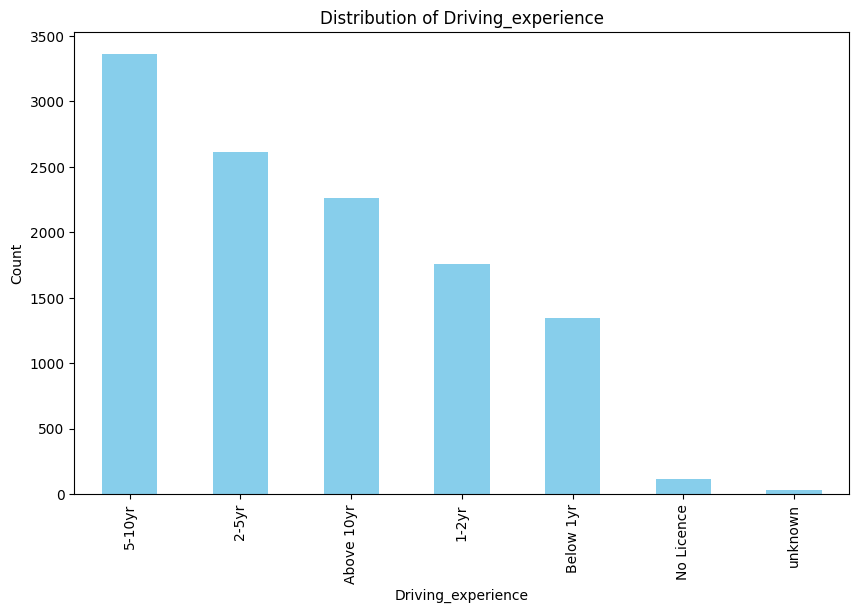

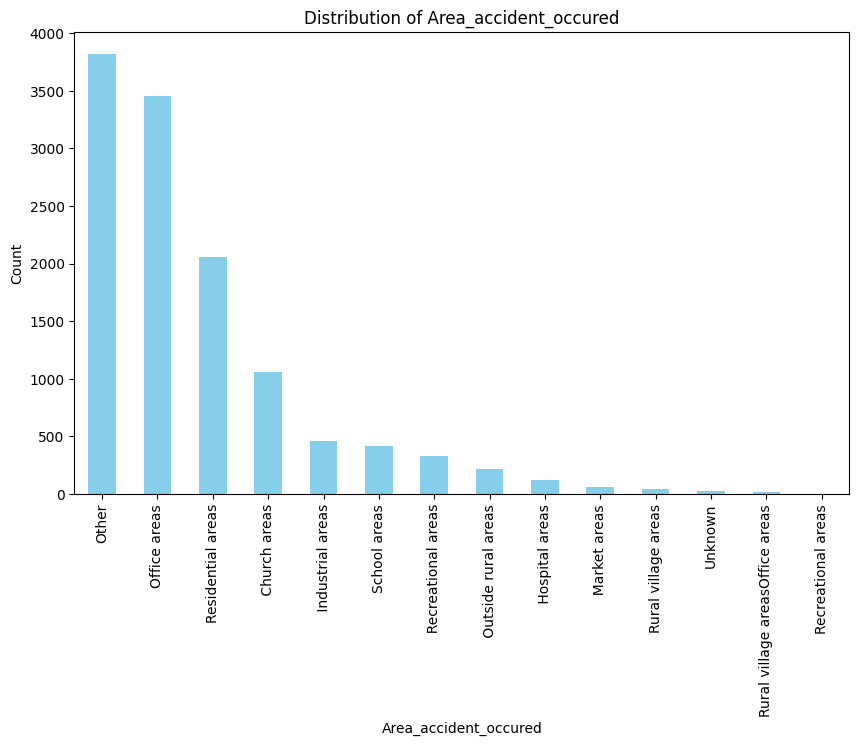

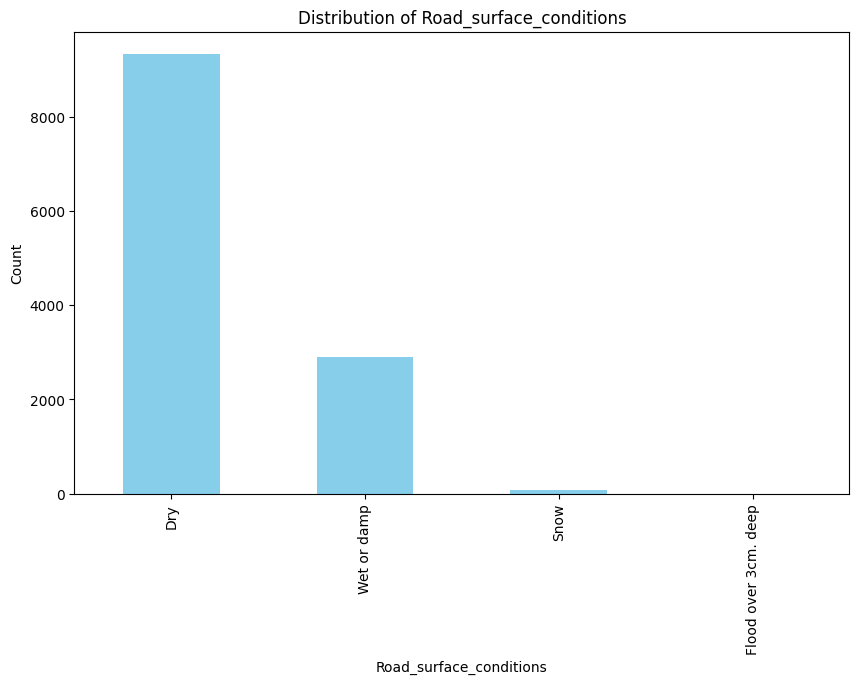

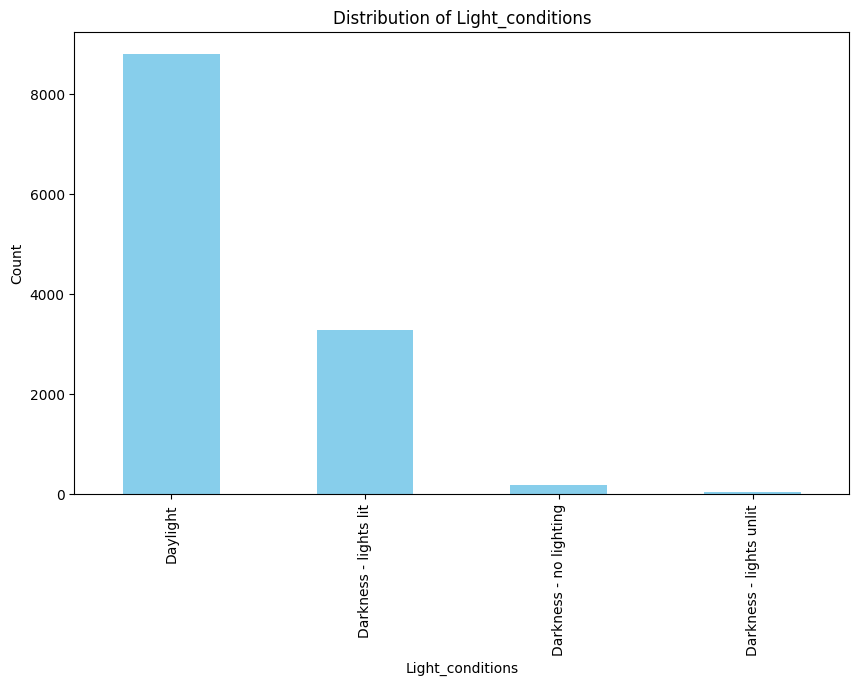

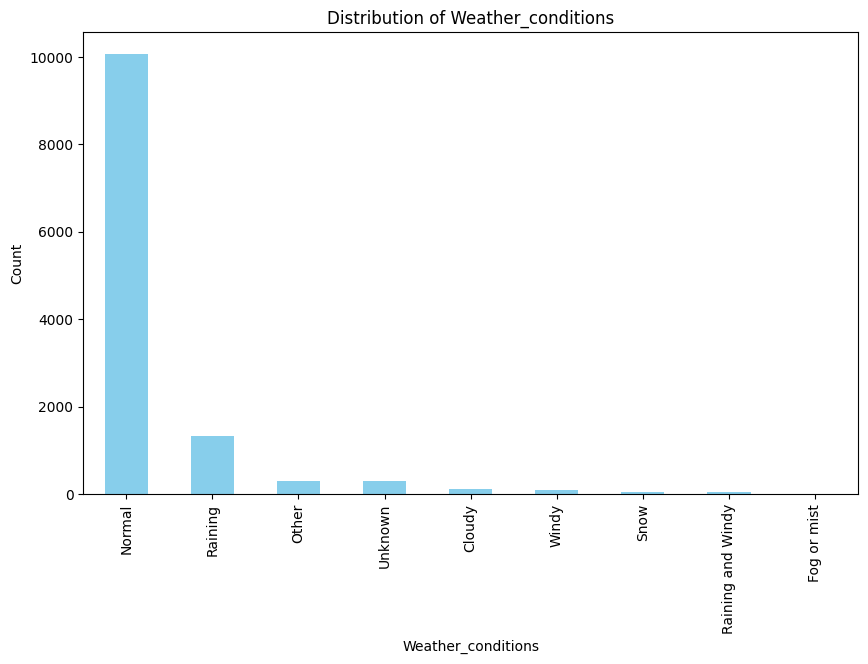

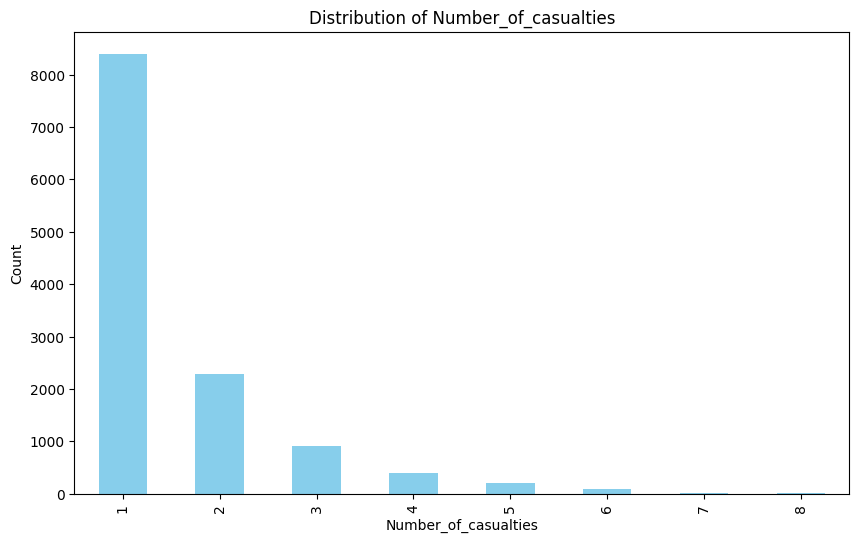

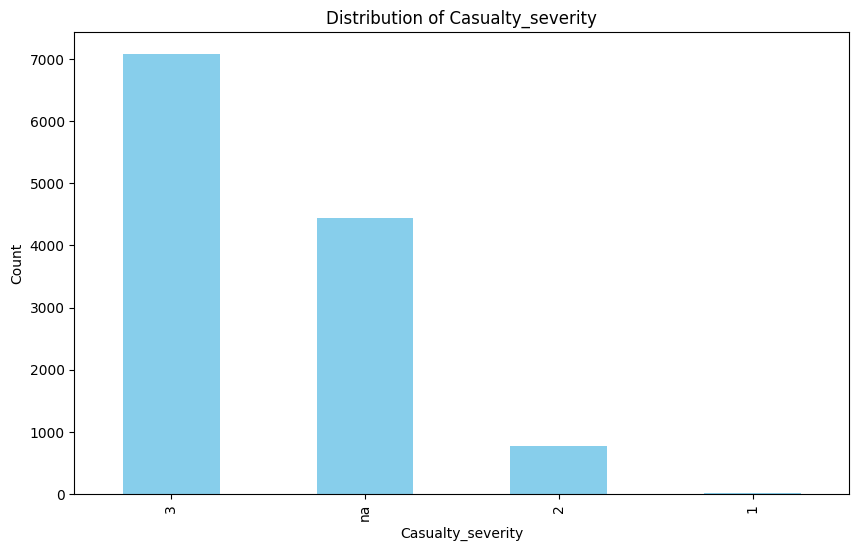

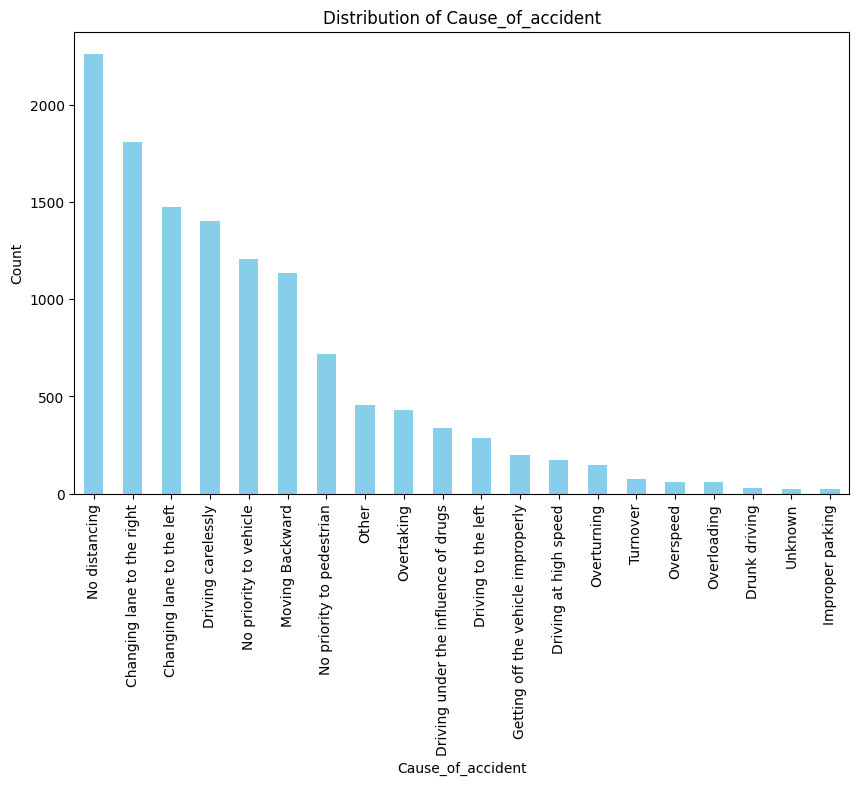

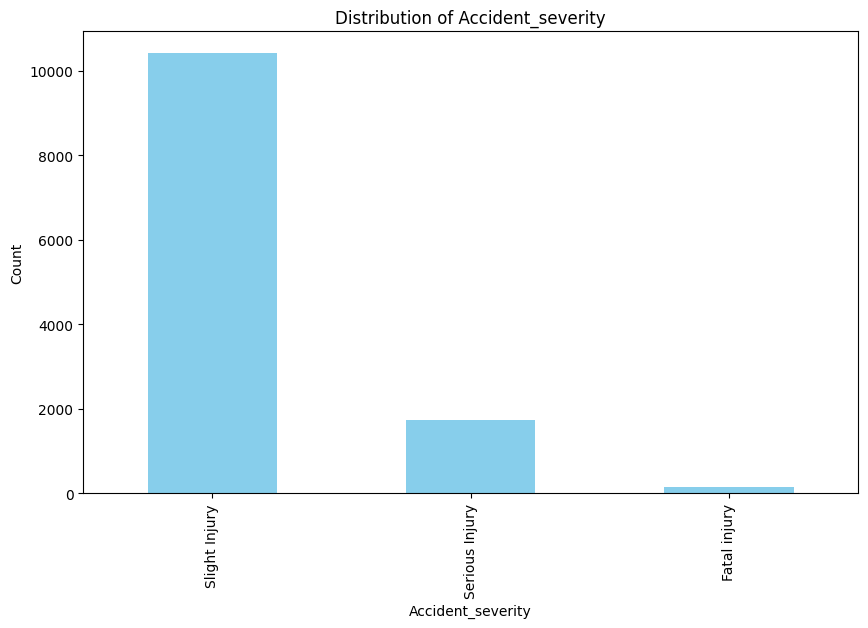

In [18]:
import matplotlib.pyplot as plt
def create_bar_graph(feature):
    plt.figure(figsize=(10, 6))
    feature_counts = df[feature].value_counts()
    feature_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()
features_to_visualize = ['Driving_experience', 'Area_accident_occured', 'Road_surface_conditions', 
                         'Light_conditions', 'Weather_conditions', 'Number_of_casualties', 
                         'Casualty_severity', 'Cause_of_accident', 'Accident_severity']
for feature in features_to_visualize:
    create_bar_graph(feature)

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
X = df[['Driving_experience', 'Area_accident_occured', 'Road_surface_conditions', 
        'Light_conditions', 'Weather_conditions', 'Number_of_casualties', 
        'Casualty_severity', 'Cause_of_accident']].copy()  # Use .copy() to create a copy of the DataFrame
y = df['Accident_severity']
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.807224025974026
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        37
Serious Injury       0.08      0.02      0.03       363
 Slight Injury       0.84      0.96      0.89      2064

      accuracy                           0.81      2464
     macro avg       0.30      0.33      0.31      2464
  weighted avg       0.71      0.81      0.75      2464

